<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=8>Artificial Intelligence and Machine Learning</center></font></h1>
<h1><center>Natural Language Processing: Twitter US Airline Sentiment</center></h1>
<h4><center>Author: Enrique Martin Sanchez</center></h4>

# Description

## Background and Context

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.

Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.

## Data Description

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

## Dataset

The dataset has the following columns:

- tweet_id                                                           
- airline_sentiment                                               
- airline_sentiment_confidence                               
- negativereason                                                   
- negativereason_confidence                         
- airline
- airline_sentiment_gold                        
- name     
- negativereason_gold 
- retweet_count
- text
- tweet_coord
- tweet_created
- tweet_location 
- user_timezone

## Objective

To implement the techniques learned as a part of the course.

# Import Libraries

In [1]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import contractions
import nltk
nltk.download('punkt')
nltk.download('all')
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer   
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix



pd.set_option('display.max_colwidth', None)
%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_d

# Support Functions

In [3]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count, 3))
    else:
        plt.figure(figsize=(n, 3))

    plt.xticks(rotation=90, fontsize=10)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = "{:,.0f}".format(
                p.get_height()
              )  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=9,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [4]:
#######################################################################################
#                                                                                     #
# two_categorical_plot function                                                       #
#                                                                                     #
# will plot a serie of countplots from a categorical variable and a list              # 
# categorical variables, along with some statistics of their relation                 #
#                                                                                     #
#######################################################################################
def two_categorical_plot(data='', var1='', hue=[], figsize=(20,10)):
  #hue is a list with several hue valors
  f1 = plt.figure(figsize=figsize)
  
  position = 1 #initialize position variable 
  for i, hue_it in enumerate(hue): #itarate for different hues
    plt.subplot(2, 3, position)
    plt.xticks(rotation=90, fontsize=10)
    position += 1
    sns.countplot(data=data, x=var1, hue=hue_it).set_title(var1.upper() + '/' + hue_it.upper()) #plot the variable with a hue

In [5]:
def get_top40_words(model, all_features):
    
    # Addition of top 40 feature into top_feature after training the model
    top_features=''   

    feat = model.feature_importances_

    features = np.argsort(feat)[::-1]

    for i in features[0:40]:
        top_features+=all_features[i]
        top_features+=','    

    from wordcloud import WordCloud
    
    wordcloud = WordCloud(background_color = "white", colormap = 'viridis', width = 2000, 
                              height = 1000).generate(top_features)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.figure(1, figsize = (14, 11), frameon='equal')
    plt.title('Top 40 features WordCloud', fontsize = 10)
    plt.axis("off")
    plt.show()

# Reading the dataset

In [6]:
# Mount Google drive to access the dataset (monkeys_dataset.zip)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Data Science/Courses/AIML University of Texas/9. Introduction to Natural Language Processing/Project 9: Natural Language Processing:  Content                                                                               ~Statement  Dataset - Tweets.csv  FAQ - Twitter US Airline Sentiment  Project Discussion Forum      Twitter US Airline Sentiment/Tweets.csv')
df = data.copy()

# Overview of the dataset

In [8]:
print(df.shape)

(14640, 15)


**Insights**
- There are 14,640 rows
- The dtaaset is formed of 15 columns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

**Insights**
- There are 4 numeric columns 
- There are 11 object columns
- There are a lot of missing values will look into it later on

In [10]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
tweet_id,14640.0,NaN,NaN,NaN,569218351767499200.0,779111158481835.875,567588278875213824.0,568559178101439488.0,569477857923110912.0,569890473289000960.0,570310600460525568.0
airline_sentiment,14640,3,negative,9178,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airline_sentiment_confidence,14640.0,NaN,NaN,NaN,0.900169,0.16283,0.335,0.6923,1.0,1.0,1.0
negativereason,9178,10,Customer Service Issue,2910,NaN,NaN,NaN,NaN,NaN,NaN,NaN
negativereason_confidence,10522.0,NaN,NaN,NaN,0.638298,0.33044,0.0,0.3606,0.6706,1.0,1.0
airline,14640,6,United,3822,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airline_sentiment_gold,40,3,negative,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,14640,7701,JetBlueNews,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
negativereason_gold,32,13,Customer Service Issue,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweet_count,14640.0,NaN,NaN,NaN,0.08265,0.745778,0.0,0.0,0.0,0.0,44.0


In [11]:
df[df.duplicated()]["tweet_id"].count()

36

In [12]:
duplicateRows = df[df.duplicated()]
duplicateRows.count()

tweet_id                        36
airline_sentiment               36
airline_sentiment_confidence    36
negativereason                  19
negativereason_confidence       19
airline                         36
airline_sentiment_gold           0
name                            36
negativereason_gold              0
retweet_count                   36
text                            36
tweet_coord                      4
tweet_created                   36
tweet_location                  26
user_timezone                   30
dtype: int64

In [13]:
df.drop_duplicates( keep='first', inplace=True)

In [14]:
df.shape

(14604, 15)

In [15]:
df[df.duplicated()].count()

tweet_id                        0
airline_sentiment               0
airline_sentiment_confidence    0
negativereason                  0
negativereason_confidence       0
airline                         0
airline_sentiment_gold          0
name                            0
negativereason_gold             0
retweet_count                   0
text                            0
tweet_coord                     0
tweet_created                   0
tweet_location                  0
user_timezone                   0
dtype: int64

**Insights**
- There were several duplicated rows in the dataset
- We removed them, and now have 14,604 rows

In [16]:
df.isnull().sum()/df.shape[0]*100

tweet_id                         0.000000
airline_sentiment                0.000000
airline_sentiment_confidence     0.000000
negativereason                  37.284306
negativereason_confidence       28.081348
airline                          0.000000
airline_sentiment_gold          99.726102
name                             0.000000
negativereason_gold             99.780882
retweet_count                    0.000000
text                             0.000000
tweet_coord                     93.049849
tweet_created                    0.000000
tweet_location                  32.340455
user_timezone                   32.963572
dtype: float64

**Insights**
- Target variable has 0 null vaalues
- Text variable has 0 null values
- Airline feature has no null values
- There are several null values in other columns, we will not fill them as columns different from text and target variable will in any case add some value to the text.

# Exploratory data analysis

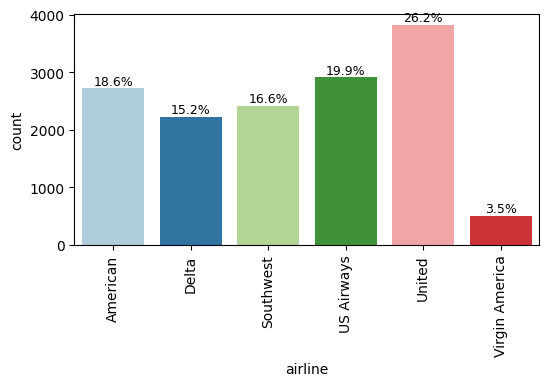

In [17]:
labeled_barplot(data=df, feature='airline', perc=True)

**Insights**
- United is the most freuqent airline with 26.2% of tweets
- Virgin America is the least frequent with only 3.5% of tweets

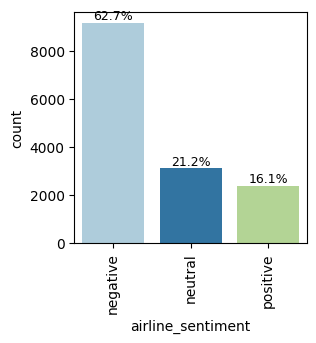

In [18]:
labeled_barplot(data=df, feature='airline_sentiment', perc=True)

**Insights**
- Negative sentiment is the most frequent (62.7%)
- Neutral sentiment is the second most frequent (21.2%)
- Positive sentiment has only 16.1% of tweets

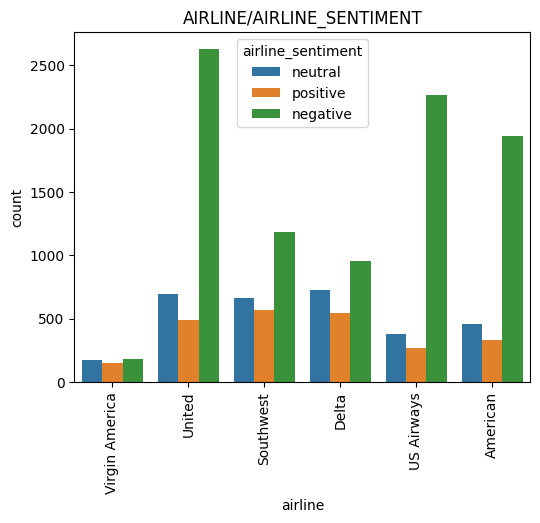

In [19]:
two_categorical_plot(data=df, var1='airline', hue=['airline_sentiment'])

**Insights**
- Virgin America has the most balanced sentiment tewwets
- United, US Airways and American have the biggest proportion of negative sentiment
- Southwest and Delta negative sentiment proportion is not as big 

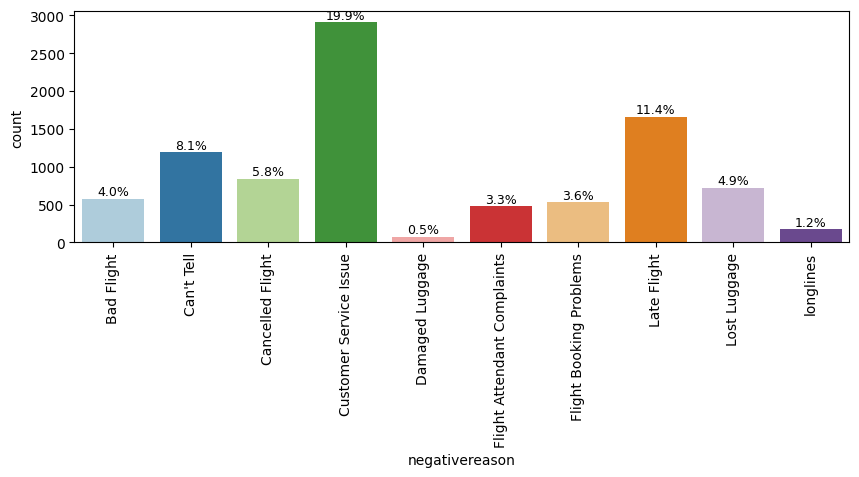

In [20]:
labeled_barplot(data=df, feature='negativereason', perc=True)

**Insights**
- Customer service issue is the most frequent with a 19.9% of tweets
- Followed by Late Flight with 11.4% of tweets
- There are another 8 negative reasons which goes from 0.5% to 8.1% each

**Word Cloud for cleaned Negative Reviews**

In [21]:
# Creating word cloud for negative reviews

# Extracting the negative reviews i.e, sentiment = 0
negative_reviews = data[data['airline_sentiment'] == 'negative']

# joining the negative reviews using space seperator, helps to convert the all rows into one string
words = ' '.join(negative_reviews['text']) 

# helps to remove the \n characters from the previous output
cleaned_word = " ".join([word for word in words.split()]) 

In [22]:
# creating the wordcloud using the WordCloud() method
wordcloud = WordCloud(stopwords = STOPWORDS,
                      colormap = 'RdBu',
                      background_color = 'white',
                      width = 3000,
                      height = 2500
                     ).generate(cleaned_word) # The generate() function takes one argument of the text we created, helps to generate the wordcloud

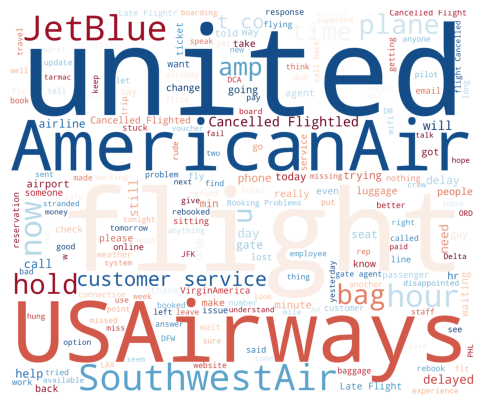

In [23]:
plt.figure(1, figsize = (6, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Insights**
**United, USAirways, AmericanAir, SouthwestAir, flight, customer service, JetBlue** were some of the important recurring words observed in the negative reviews. 

**Word Cloud for cleaned Positive Reviews**

In [24]:
# Creating word cloud for positive reviews

# Extracting the negative reviews 
negative_reviews = data[data['airline_sentiment'] == 'positive']

# joining the negative reviews using space seperator, helps to convert the all rows into one string
words = ' '.join(negative_reviews['text']) 

# helps to remove the \n characters from the previous output
cleaned_word = " ".join([word for word in words.split()]) 

In [25]:
# creating the wordcloud using the WordCloud() method
wordcloud = WordCloud(stopwords = STOPWORDS,
                      colormap = 'RdBu',
                      background_color = 'white',
                      width = 3000,
                      height = 2500
                     ).generate(cleaned_word) # The generate() function takes one argument of the text we created, helps to generate the wordcloud

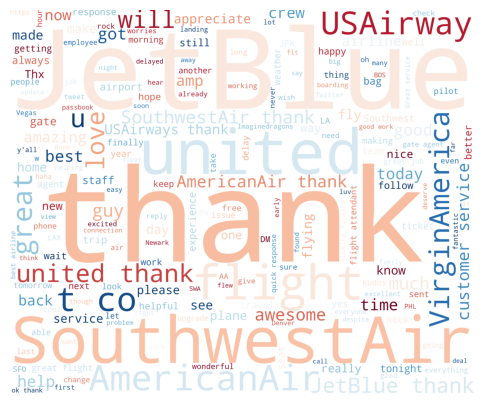

In [26]:
plt.figure(1, figsize = (6, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Insights**
**JetBlue, thank, united, AmericanAir, flight, SouthwestAir** were some of the important words observed in the positive reviews

# Analyzing data columns

**tweet_id**

In [27]:
print(df.tweet_id.nunique() / df.shape[0] * 100, "%")

99.18515475212271 %


In [28]:
df_clean = df.drop(columns=['tweet_id'])

**Insights**
- tweet_id is an identifier, it has more than 99% unique values
- It doesn't add value to our model so we drop it

**airline_sentiment**

it is our target variable 

**airline_sentiment_confidence**

In [29]:
df.airline_sentiment_confidence.value_counts()

1.0000    10409
0.6667       71
0.6632       35
0.6596       30
0.6559       30
          ...  
0.3674        1
0.6155        1
0.3708        1
0.6905        1
0.3487        1
Name: airline_sentiment_confidence, Length: 1023, dtype: int64

In [30]:
df.airline_sentiment_confidence.describe()

count    14604.000000
mean         0.899923
std          0.162955
min          0.335000
25%          0.692300
50%          1.000000
75%          1.000000
max          1.000000
Name: airline_sentiment_confidence, dtype: float64

In [31]:
df_clean = df_clean.drop(columns=['airline_sentiment_confidence'])

**Insights**
- airline_sentiment_confidence ranges between 0 and 1 
- it is a percentage of confidence of the sentiment
- it does not add value to our model, so we drop it

**negativereason**

In [32]:
df.negativereason.value_counts()

Customer Service Issue         2904
Late Flight                    1660
Can't Tell                     1190
Cancelled Flight                843
Lost Luggage                    721
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     480
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

**Insights**
- negativereason is a text summary of the negative sentiment, we will keep it and treat it later on

**negativereason_confidence**

In [33]:
df.negativereason_confidence.value_counts()

1.0000    3417
0.0000    1344
0.6667      62
0.6632      33
0.6596      29
          ... 
0.3713       1
0.3386       1
0.6449       1
0.3274       1
0.7255       1
Name: negativereason_confidence, Length: 1410, dtype: int64

In [34]:
df.negativereason_confidence.describe()

count    10503.000000
mean         0.637644
std          0.330380
min          0.000000
25%          0.360500
50%          0.670500
75%          1.000000
max          1.000000
Name: negativereason_confidence, dtype: float64

In [35]:
df_clean = df_clean.drop(columns=['negativereason_confidence'])

**Insights**
- negativereason_confidence is a percentage of confidence
- It does not add value to our model, so we drop it

**airline**

In [36]:
df.airline.value_counts()

United            3822
US Airways        2913
American          2723
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

**Insights**
- airline has the name of the airline, we will keep it and add it to our text to anlyze ater on

**airline_sentiment_gold**

In [37]:
df.airline_sentiment_gold.value_counts()

negative    32
positive     5
neutral      3
Name: airline_sentiment_gold, dtype: int64

In [38]:
df[df.airline_sentiment_gold == 'negative'].airline_sentiment.value_counts()

negative    32
Name: airline_sentiment, dtype: int64

In [39]:
df[df.airline_sentiment_gold == 'positive'].airline_sentiment.value_counts()

positive    5
Name: airline_sentiment, dtype: int64

In [40]:
df[df.airline_sentiment_gold == 'neutral'].airline_sentiment.value_counts()

neutral    3
Name: airline_sentiment, dtype: int64

In [41]:
df_clean = df_clean.drop(columns=['airline_sentiment_gold'])

**Insights**
- In the few cases that this featura has a value is the exact same one that we have in airline_sentiment
- It does not add value to our model, we drop it

**name**

In [42]:
df.name.nunique()

7701

In [43]:
df.name.sample(10)

11497         Shrubbette
2552          ryaneaster
10846          kimlynam2
14269       MattWalter13
12825       CorsoSystems
6334     PaytonTaylor129
9454      Bachelorsaurus
1287        anthonyNYSSF
7713           AndrewATZ
5084      JustaThoughtR2
Name: name, dtype: object

In [44]:
df_clean = df_clean.drop(columns=['name'])

**Insights**
- name feature is the name of the twiter account
- It does not add value to our model, we drop it

**negativereason_gold**

In [45]:
df.negativereason_gold.value_counts()

Customer Service Issue                      12
Late Flight                                  4
Can't Tell                                   3
Cancelled Flight                             3
Cancelled Flight\nCustomer Service Issue     2
Late Flight\nFlight Attendant Complaints     1
Late Flight\nLost Luggage                    1
Bad Flight                                   1
Lost Luggage\nDamaged Luggage                1
Late Flight\nCancelled Flight                1
Flight Attendant Complaints                  1
Customer Service Issue\nLost Luggage         1
Customer Service Issue\nCan't Tell           1
Name: negativereason_gold, dtype: int64

**Insights**
- This feature have a text summary of the reasons of a negative sentiment, we will keep it and add it to our text analysis later on

**retweet_count**

In [46]:
df.retweet_count.value_counts()

0     13838
1       639
2        66
3        22
4        17
5         5
7         3
6         3
22        2
8         1
32        1
28        1
9         1
18        1
11        1
31        1
15        1
44        1
Name: retweet_count, dtype: int64

In [47]:
df_clean = df_clean.drop(columns=['retweet_count'])

**Insights**
- retweet_count is the number of retweets
- It does not add value to our model, we drop it

**text**

In [48]:
df.text.sample(10)

14342        @AmericanAir u Cancelled Flightled my flight for tomorrow and tell me to call reservations but then refuse to take my call!!!  #not cool #hateful
414                                                                   @VirginAmerica Only thing I see on passbook is Virgin Mobile Mexico. How do I integrate?
3073                                                                                                              @united  oh united, how much I despise thee!
13692    @AmericanAir Worst airline. You Cancelled Flight flight, don't let me know, I wait on hold 30 mins, told to enter callback for middle of the night?!!
1176                                                                         @united #UnitedAirlines Any other way ORD to ABQ anytime within the next 7 hours?
8907                                          @JetBlue @JayVig @roxydigital awww ^_^ R to the T, realtime appreciation from JetBlue #rockingthetweets #JVMChat
10742                                         

**Insights**
- text feature is the body of the tweet message
- we will keep it

**tweet_coord**

In [49]:
df[df.tweet_coord.notnull()].tweet_coord.sample(10)

9747      [32.43487013, -80.64150369]
7275      [40.89343356, -74.29961359]
2409      [31.27777976, 121.59340615]
289                        [0.0, 0.0]
11957     [40.68994668, -73.91637642]
10124     [39.87309176, -75.24413798]
6485      [40.65947097, -74.16982402]
943       [40.69943599, -74.17868875]
2063     [33.94171725, -118.39844033]
11699      [25.8801693, -80.14141202]
Name: tweet_coord, dtype: object

In [50]:
df_clean = df_clean.drop(columns=['tweet_coord'])

**Insights**
- tweet_coord are the coordinates from where the tweet was sent
- It does not add value to our model, we drop it

**tweet_created**

In [51]:
df.tweet_created.sample(10)

338      2015-02-19 17:04:14 -0800
5882     2015-02-19 13:21:29 -0800
5132     2015-02-21 18:09:33 -0800
12959    2015-02-23 13:33:13 -0800
4775     2015-02-23 04:34:50 -0800
7642     2015-02-22 04:29:35 -0800
5137     2015-02-21 17:52:32 -0800
6912     2015-02-23 17:40:34 -0800
9224     2015-02-23 18:46:32 -0800
643      2015-02-24 06:43:24 -0800
Name: tweet_created, dtype: object

In [52]:
df_clean = df_clean.drop(columns=['tweet_created'])

**Insights**
- tweet_created is the date that the tweet was sent
- It does not add value to our model, we drop it

**tweet_location**

In [53]:
df.tweet_location.sample(10)

5198                         NaN
4615            Philadelphia, PA
12849    St. Louis, Missouri USA
2705                 Chapel Hill
10737          Philadelphia, USA
469       SF Bay Area/ Las Vegas
1543                        Utah
11204                        NaN
7535          New York, sort of!
13293                        NaN
Name: tweet_location, dtype: object

In [54]:
df_clean = df_clean.drop(columns=['tweet_location'])

**Insights**
- tweet_location is the location from where the tweet was sent
- It does not add value to our model, we drop it

**user_timezone**

In [55]:
df.user_timezone.sample(10)

857      Pacific Time (US & Canada)
10616    Eastern Time (US & Canada)
9146                            NaN
339      Pacific Time (US & Canada)
9617                            NaN
14313                        Athens
7748                            NaN
3444     Pacific Time (US & Canada)
2770                            NaN
531      Eastern Time (US & Canada)
Name: user_timezone, dtype: object

In [56]:
df_clean = df_clean.drop(columns=['user_timezone'])

**Insights**
- user_timezone is the time zone where the tweet was created
- It does not add value to our model, we drop it

**How does our dataset looks like**

In [57]:
df_clean[df_clean.negativereason_gold.notnull()].sample(10)

,airline_sentiment,negativereason,airline,negativereason_gold,text
2017,negative,Late Flight,United,Late Flight\nLost Luggage,@united flighted delayed for hours. 10pm arrival to Vegas is now 4am. Did you seriously lose my luggage???
12025,negative,Cancelled Flight,American,Late Flight\nCancelled Flight,@AmericanAir over the last year 50% of my flights have been delayed or Cancelled Flightled. I'm done with you.
12029,negative,Customer Service Issue,American,Customer Service Issue,@AmericanAir 800 number will not even let you wait for next customer rep. Very frustrating. Can't talk to humans.
12026,negative,Customer Service Issue,American,Customer Service Issue,@AmericanAir FYI...call stilling getting dropped. After an hour of continuous dialing. Attempted to Cancelled Flight online but not able to. HELP!!!
12035,negative,Customer Service Issue,American,Customer Service Issue,"@AmericanAir - how long does it take to get credit to my AA account? Traveled in Jan &amp; only one leg reported. Asked for credit, no response."
6530,negative,Customer Service Issue,Southwest,Cancelled Flight\nCustomer Service Issue,@SouthwestAir I never got a Cancelled Flightlation text from this morning either #bushleague or a number to call #weakservice
2383,negative,Customer Service Issue,United,Customer Service Issue,@united You shouldn't page o'head that it's best to call 1-800# - on hold 26+ mins
12037,negative,Late Flight,American,Late Flight,"@AmericanAir Okay, I think 1565 has waited long enough for a gate at DFW..."
5810,negative,Bad Flight,Southwest,Bad Flight,@SouthwestAir please do something about the speed of your WiFi connections on your planes. It might as well be non-existent.
1286,negative,Late Flight,United,Late Flight\nFlight Attendant Complaints,"@united I'm aware of the flight details, thanks. Three hours Late Flight a crew that could not give less of a shit"


**Insights**
- we can see that negativereason and negativereason_gold are not always the same, so we will keep them both

In [58]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14604 entries, 0 to 14639
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   airline_sentiment    14604 non-null  object
 1   negativereason       9159 non-null   object
 2   airline              14604 non-null  object
 3   negativereason_gold  32 non-null     object
 4   text                 14604 non-null  object
dtypes: object(5)
memory usage: 684.6+ KB


**Insights**
- airline_sentiment is our target variable
- We have 4 text columns for our analysis

In [59]:
df_clean.shape

(14604, 5)

**Insights**
- We have 14,604 rows and 5 columns

In [60]:
df_clean[df_clean.duplicated()].count()

airline_sentiment      114
negativereason          34
airline                114
negativereason_gold      0
text                   114
dtype: int64

In [61]:
df_clean[df_clean.duplicated()].sample(10)

,airline_sentiment,negativereason,airline,negativereason_gold,text
13210,positive,NaN,American,NaN,@AmericanAir Thank you.
11845,positive,NaN,US Airways,NaN,@USAirways thanks
12050,neutral,NaN,American,NaN,@AmericanAir 767 seconds from touchdown at Madrid airport in April 2013 #AvGeek http://t.co/1yWXRfn0Gr
331,positive,NaN,Virgin America,NaN,@VirginAmerica Thanks!
12131,negative,Can't Tell,American,NaN,@AmericanAir and @iTunesMusic have put me in bad mood. I haven't been this angry since Spagnuolo coached the #Rams
12067,negative,Customer Service Issue,American,NaN,.@AmericanAir can you connect me to a person without having to wait 2+ hours on hold? I still haven't been able to resolve the problem.
12058,negative,Bad Flight,American,NaN,@americanair thanks for no fresh food on my cross country flight and for making my connection so close No time to eat. TPA-DFW-LAX
12160,negative,longlines,American,NaN,@AmericanAir how about some rampers at gate b40 dfw? Waiting to be marshaled in
2985,neutral,NaN,United,NaN,@united done
13442,positive,NaN,American,NaN,@AmericanAir thank you!


In [62]:
df_clean.drop_duplicates(inplace=True)

In [63]:
df_clean.shape

(14490, 5)

In [64]:
df_clean.isnull().sum()

airline_sentiment          0
negativereason          5365
airline                    0
negativereason_gold    14458
text                       0
dtype: int64

In [65]:
df_clean.fillna('', inplace=True)

In [66]:
df_clean.sample(10)

,airline_sentiment,negativereason,airline,negativereason_gold,text
1639,neutral,,United,,@united @jeffsmisek @RobertFor39 @Fioretti2ndWard @garcia4chicago \nFAA invest near miss on O'Hare runway last wk:http://t.co/jVJ73ZZa4A
11189,positive,,US Airways,,@USAirways thank you for refunding my bag fee. I look forward to its return today I hope.
2981,negative,Can't Tell,United,,"@united @upgrd I guess the Kit Kat looks tasty... not going near that ""sandwich."""
2995,positive,,United,,@united good fly!! #United #businessFirst
4813,negative,Lost Luggage,Southwest,,@SouthwestAir would really like my baggage from yesterday. Employees at Akron giving me a tough time.
8540,negative,Damaged Luggage,Delta,,@JetBlue U say our safety is our highest priority but that doesn't extend 2 our property? This is totally nuts. http://t.co/xZY7pHKFGR
11210,negative,Customer Service Issue,US Airways,,@USAirways that's it?!?!?
989,neutral,,United,,"@united Thank you, ^JH, appreciate the prompt responses--me and other passengers will be doing so."
1373,neutral,,United,,@united In Ethiopia adopting a child. Need flight home from ADD to GRR Late Flight 2/27 or very early 2/28. (need to change existing reservation)
14016,negative,Damaged Luggage,American,,@AmericanAir it shouldn't happen but did and has put us and our gear in jeopardy. What steps do you take to protect customers if their items


**Insights**
- After droping a few columns our data ended with 114 duplicated rows
- We drop the duplicated rows
- We ended with 14,490 rows of data
- We treated the NaN values replacing them with empty strings

**Concatenating text columns and drop them**

In [67]:
df_clean['text_new'] = df_clean[["negativereason","airline","negativereason_gold","text"]].apply(" ".join, axis=1)

In [68]:
df_clean[df_clean.negativereason_gold != ''].sample(10)

,airline_sentiment,negativereason,airline,negativereason_gold,text,text_new
12029,negative,Customer Service Issue,American,Customer Service Issue,@AmericanAir 800 number will not even let you wait for next customer rep. Very frustrating. Can't talk to humans.,Customer Service Issue American Customer Service Issue @AmericanAir 800 number will not even let you wait for next customer rep. Very frustrating. Can't talk to humans.
3005,negative,Can't Tell,United,Can't Tell,@united couldn't have possibly messed up our trip anymore than they did. Thanks for being such a terrible airline. #disappointed,Can't Tell United Can't Tell @united couldn't have possibly messed up our trip anymore than they did. Thanks for being such a terrible airline. #disappointed
8207,negative,Can't Tell,Delta,Can't Tell,@JetBlue time to reevaluate my nyc carrier.,Can't Tell Delta Can't Tell @JetBlue time to reevaluate my nyc carrier.
12027,negative,Customer Service Issue,American,Customer Service Issue,@AmericanAir how can I get you guys to respond to my tweets and DM??? Really sad feeling to be ignored.,Customer Service Issue American Customer Service Issue @AmericanAir how can I get you guys to respond to my tweets and DM??? Really sad feeling to be ignored.
8739,negative,Cancelled Flight,Delta,Cancelled Flight,"@JetBlue I'm disappointed my flight was Cancelled Flighted, mostly because I was excited to listen to the song ""I'm Blue"" while flying on JetBlue.","Cancelled Flight Delta Cancelled Flight @JetBlue I'm disappointed my flight was Cancelled Flighted, mostly because I was excited to listen to the song ""I'm Blue"" while flying on JetBlue."
12034,negative,Lost Luggage,American,Customer Service Issue\nLost Luggage,@AmericanAir you need to work harder on the disconnect between your intention and the reality your passengers face,Lost Luggage American Customer Service Issue\nLost Luggage @AmericanAir you need to work harder on the disconnect between your intention and the reality your passengers face
2201,negative,Late Flight,United,Late Flight,@united it's been over 3 hours...at what point do you let people off of the plane? @FoxNews @CNN @msnbc,Late Flight United Late Flight @united it's been over 3 hours...at what point do you let people off of the plane? @FoxNews @CNN @msnbc
12031,negative,Customer Service Issue,American,Customer Service Issue,@AmericanAir no response to DM or email yet. customer service?,Customer Service Issue American Customer Service Issue @AmericanAir no response to DM or email yet. customer service?
8536,negative,Lost Luggage,Delta,Lost Luggage\nDamaged Luggage,@JetBlue I am heading to JFK now just on principle alone to deal w my lost &amp; damaged bag. #jetblue #jetbluesucks #jfk #badservice #fail,Lost Luggage Delta Lost Luggage\nDamaged Luggage @JetBlue I am heading to JFK now just on principle alone to deal w my lost &amp; damaged bag. #jetblue #jetbluesucks #jfk #badservice #fail
12039,negative,Can't Tell,Delta,Customer Service Issue\nCan't Tell,@DeltaAssist what I have to say is more than 140 characters! Plus you don't follow me,Can't Tell Delta Customer Service Issue\nCan't Tell @DeltaAssist what I have to say is more than 140 characters! Plus you don't follow me


In [69]:
df_clean = df_clean.drop(columns=['negativereason','negativereason_gold','airline','text'])

In [70]:
df_clean

,airline_sentiment,text_new
0,neutral,Virgin America @VirginAmerica What @dhepburn said.
1,positive,Virgin America @VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,Virgin America @VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"Bad Flight Virgin America @VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,Can't Tell Virgin America @VirginAmerica and it's a really big bad thing about it
...,...,...
14635,positive,American @AmericanAir thank you we got on a different flight to Chicago.
14636,negative,Customer Service Issue American @AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc
14637,neutral,American @AmericanAir Please bring American Airlines to #BlackBerry10
14638,negative,"Customer Service Issue American @AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??"


**insights**
- We ended with only 1 text column (text_new) and our target feature (airline_sentiment)

# Data Pre - Processing

In [94]:
# function for text pre-processing
def clean_text(df, punctuations=r'''!()-[]{};:'"\,<>./?@#$%^&*_~'''):
    """
    A method to clean text 
    """
    # Cleaning the urls
    string = re.sub(r'https?://\S+|www\.\S+', '', df)

    # Cleaning the html elements
    string = re.sub(r'<.*?>', '', df)

    # Removing the punctuations using regular expression
    # i.e remove anything which is not word or whitespace character
    
    string = re.sub(r'[^\w\s]', '', df)

    # Converting the text to lower
    string = string.lower()

    # Removing stop words
    string = ' '.join([word for word in string.split() if word not in stopwords.words('english')])

    # Cleaning the whitespaces
    string = re.sub(r'\s+', ' ', string).strip()

    #tokenize data
    string = word_tokenize(string)

    #remove number
    string=[s for s in string if s.isalpha()]

    #lemmatize the data
    string= [WordNetLemmatizer().lemmatize(i) for i in string]

    #fix contractions (example: "'cause": "because","could've": "could have",etc)
    string = ' '.join([contractions.fix(word) for word in string])


    return string 

In [95]:
df_clean["text_new"] = df_clean["text_new"].astype(str) 
df_clean['clean_text'] = df_clean['text_new'].apply(clean_text)

In [96]:
df_clean.head(10)

,airline_sentiment,text_new,clean_text
0,neutral,Virgin America @VirginAmerica What @dhepburn said.,virgin america virginamerica dhepburn said
1,positive,Virgin America @VirginAmerica plus you've added commercials to the experience... tacky.,virgin america virginamerica plus you have added commercial experience tacky
2,neutral,Virgin America @VirginAmerica I didn't today... Must mean I need to take another trip!,virgin america virginamerica did not today must mean need take another trip
3,negative,"Bad Flight Virgin America @VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",bad flight virgin america virginamerica really aggressive blast obnoxious entertainment guest face amp little recourse
4,negative,Can't Tell Virgin America @VirginAmerica and it's a really big bad thing about it,cannot tell virgin america virginamerica really big bad thing
5,negative,Can't Tell Virgin America @VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA,cannot tell virgin america virginamerica seriously would pay flight seat did not playing really bad thing flying va
6,positive,"Virgin America @VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)",virgin america virginamerica yes nearly every time fly vx ear worm will not go away
7,neutral,"Virgin America @VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP",virgin america virginamerica really missed prime opportunity men without hat parody
8,positive,"Virgin America @virginamerica Well, I didn't…but NOW I DO! :-D",virgin america virginamerica well didntbut
9,positive,"Virgin America @VirginAmerica it was amazing, and arrived an hour early. You're too good to me.",virgin america virginamerica amazing arrived hour early you are good


# Bag of Words

In [124]:
# Vectorization (Convert text data to numbers).
# Keep only 100 features as number of features will increase the processing time.
Count_vec = CountVectorizer(max_features = 1000)
data_features = Count_vec.fit_transform(df_clean['clean_text']).toarray()

In [125]:
# Printing the identified Unique words along with their indices
print("Vocabulary: ", Count_vec.vocabulary_)
# Summarizing the Encoded Texts
print("Encoded Document is:")
print(data_features)

Vocabulary:  {'virgin': 936, 'america': 31, 'virginamerica': 937, 'said': 740, 'plus': 657, 'you': 997, 'have': 409, 'added': 10, 'experience': 294, 'did': 242, 'not': 595, 'today': 876, 'must': 576, 'mean': 541, 'need': 580, 'take': 846, 'another': 38, 'trip': 893, 'bad': 80, 'flight': 332, 'really': 689, 'entertainment': 276, 'amp': 35, 'little': 508, 'cannot': 127, 'tell': 855, 'big': 92, 'thing': 866, 'seriously': 765, 'would': 988, 'pay': 634, 'seat': 751, 'flying': 345, 'yes': 994, 'every': 284, 'time': 873, 'fly': 343, 'will': 968, 'go': 380, 'away': 75, 'missed': 562, 'without': 974, 'well': 961, 'amazing': 30, 'arrived': 58, 'hour': 434, 'early': 264, 'are': 53, 'good': 386, 'know': 477, 'second': 754, 'because': 86, 'pretty': 668, 'much': 574, 'better': 90, 'great': 388, 'deal': 220, 'already': 26, 'even': 281, 'gone': 385, 'yet': 996, 'am': 29, 'sky': 786, 'travel': 887, 'thanks': 861, 'late': 486, 'schedule': 747, 'still': 821, 'mia': 551, 'excited': 290, 'first': 324, 'cou

In [126]:
# Shape of the feature vector
data_features.shape

(14490, 1000)

In [127]:
X = data_features

y = df_clean['airline_sentiment']

In [128]:
# Split data into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y)

In [129]:
# Encoding the target variable
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_test_encoded=enc.transform(y_test)

In [130]:
print("Shape of Training set : ", X_train.shape)

print("Shape of test set : ", X_test.shape)

print("Percentage of classes in training set:")

print(y_train.value_counts(normalize = True))

print("Percentage of classes in test set:")

print(y_test.value_counts(normalize = True))

Shape of Training set :  (10867, 1000)
Shape of test set :  (3623, 1000)
Percentage of classes in training set:
negative    0.629797
neutral     0.211650
positive    0.158553
Name: airline_sentiment, dtype: float64
Percentage of classes in test set:
negative    0.629589
neutral     0.211703
positive    0.158708
Name: airline_sentiment, dtype: float64


In [131]:
# Training the best model 

clf = RandomForestClassifier(n_estimators = 100)

clf.fit(X_train, y_train_encoded)

y_pred_test = clf.predict(X_test)


In [132]:
accuracy_score(y_test_encoded, y_pred_test)

0.8818658570245653

In [133]:
# printing the classification report to see how well the model performed on test data
print(classification_report(y_test_encoded, y_pred_test, zero_division=0))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2281
           1       0.81      0.74      0.77       767
           2       0.77      0.61      0.68       575

   micro avg       0.92      0.88      0.90      3623
   macro avg       0.85      0.78      0.82      3623
weighted avg       0.91      0.88      0.89      3623
 samples avg       0.88      0.88      0.88      3623



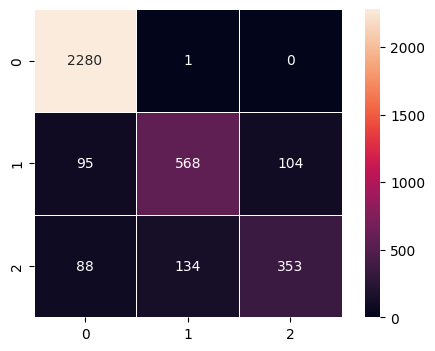

In [134]:
y_pred_arg_2=np.argmax(y_pred_test,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg_2)
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

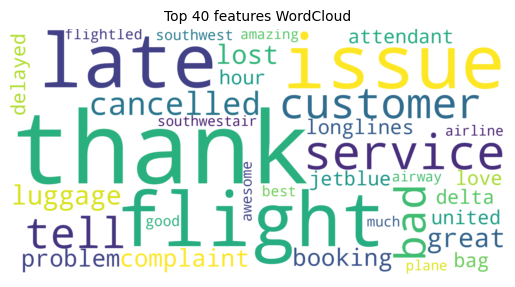

In [135]:
 #Instantiate the feature from the vectorizer
    
features = Count_vec.get_feature_names_out()   

get_top40_words(clf,features)

**thank, flight, late, issue, customer, service, cancelled and bad** are some of the most relevant words of the vocabiulary

# TF-IDF

In [136]:
# Using TfidfVectorizer to convert text data to numbers.
tfidf_vect = TfidfVectorizer(max_features = 1000)

data_features = tfidf_vect.fit_transform(df_clean['clean_text'])

data_features = data_features.toarray()

# Feature shape
data_features.shape  

(14490, 1000)

In [137]:
X = data_features

y = df_clean.airline_sentiment

In [138]:
# Split data into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [139]:
# encoding the target variable
enc1 = LabelBinarizer()
y_train_encoded = enc1.fit_transform(y_train)
y_test_encoded=enc1.transform(y_test)

In [140]:
print("Shape of Training set : ", X_train.shape)

print("Shape of test set : ", X_test.shape)

print("Percentage of classes in training set:")

print(y_train.value_counts(normalize = True))

print("Percentage of classes in test set:")

print(y_test.value_counts(normalize = True))

Shape of Training set :  (10867, 1000)
Shape of test set :  (3623, 1000)
Percentage of classes in training set:
negative    0.629797
neutral     0.211650
positive    0.158553
Name: airline_sentiment, dtype: float64
Percentage of classes in test set:
negative    0.629589
neutral     0.211703
positive    0.158708
Name: airline_sentiment, dtype: float64


In [141]:
# Training the best model 

clf1 = RandomForestClassifier(n_estimators = 100)

clf1.fit(X_train, y_train_encoded)

y_pred_test1 = clf1.predict(X_test)

In [142]:
accuracy_score(y_test_encoded, y_pred_test1)

0.8818658570245653

In [143]:
# printing the classification report to see how well the model performed on test data
print(classification_report(y_test_encoded, y_pred_test1, zero_division=0))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2281
           1       0.80      0.77      0.79       767
           2       0.84      0.58      0.69       575

   micro avg       0.92      0.88      0.90      3623
   macro avg       0.87      0.78      0.82      3623
weighted avg       0.92      0.88      0.90      3623
 samples avg       0.88      0.88      0.88      3623



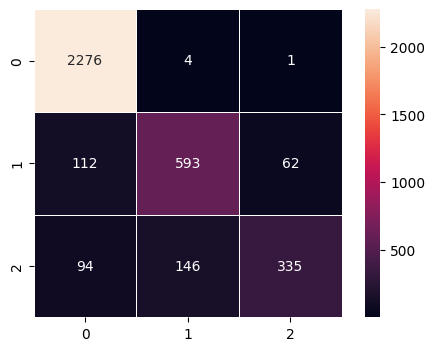

In [144]:
y_pred_arg_2=np.argmax(y_pred_test1,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg_2)
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

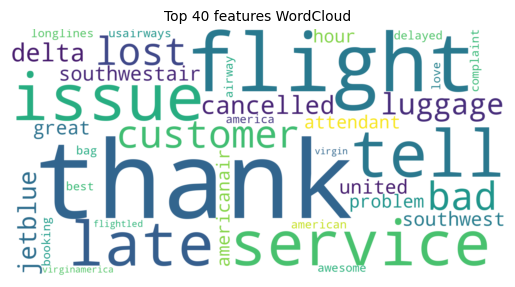

In [145]:
#Instantiate the feature from the vectorizer 
features = tfidf_vect.get_feature_names_out()  

get_top40_words(clf1,features)

**thank, flight, issue, late, service, customer, bad and lost** are some of the most relevant features (words)


# Model comparison

Both model metrics are practically the same:
- Accuracy 88% both of them
- Precision 92% both of them
- Recall 88% both of them
- F1 90% both of them


**TF-IDF shows a better performance than Count Vectorizer**, because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. We can then remove the words that are less important for analysis, hence making the model building less complex by reducing the input dimensions.

# Summary

- We used text from different fetures of the dataset, combining them together
- We applyied the following data preprocessing:
  - Cleaned urls
  - Cleaned html elements
  - Removed punctuation (anything different of word or whitespace)
  - Casted the text to lower case
  - Removed stop words
  - Cleaned whitespaces
  - Tokenized the data
  - Removed numbers
  - Lemmatized the data
  - Fixed contractions
- This gave us a cleaned text to train our models
- We used two different vectorizers:
  - CountVectorizer that change the features to numbers based on the count that they appear in the corpus
  - TF-IDF Vectorizer Term Frequency - Inverse Document Frequency: It makes sure that less importance is given to the most frequent words, and it also considers less frequent words.
- Once we had our text vectorized with both vectorizers we used it to train a random forest classifier 
- We evaluate both of them and compared their results
- We found the top 40 features (words) for both of them

# Convert ipynb to HTML

In [147]:
%%shell
jupyter nbconvert --to html ///content/Project_9_Twitter_US_Airline_Sentiment_EMS.ipynb

[NbConvertApp] Converting notebook ///content/Project_9_Twitter_US_Airline_Sentiment_EMS.ipynb to html
[NbConvertApp] Writing 1715061 bytes to /content/Project_9_Twitter_US_Airline_Sentiment_EMS.html
